Accuracy score: 0.95625
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        76
           1       1.00      0.82      0.90        11
           2       0.95      0.98      0.96        42
           3       0.90      0.95      0.93        20
           4       0.89      0.73      0.80        11

    accuracy                           0.96       160
   macro avg       0.94      0.89      0.92       160
weighted avg       0.96      0.96      0.95       160



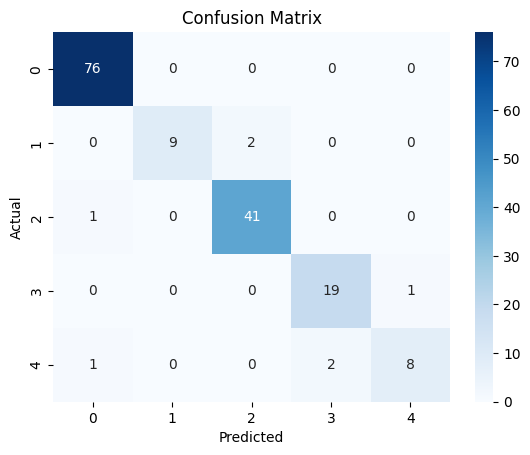

In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drug200.csv')

# Conversion of non numerical data in the dataframe to numerical data

df.Sex = df.Sex.apply(lambda p: 0 if p == 'M' else 1)
df.BP = df.BP.apply(lambda p: 0 if p == 'NORMAL' else (-1 if p == 'LOW' else 1))
df.Cholesterol = df.Cholesterol.apply(lambda p: 0 if p == 'NORMAL' else 1)

def convertor(row,values):
  i = 0
  while row != values[i]:
    i += 1
  return i

drug_values = df.Drug.unique()
df.Drug = df.Drug.apply(lambda x: convertor(x,drug_values))

# Train-test splitting of the dataset

df_train, df_test = train_test_split(df, test_size = 0.8)
X_train = df_train.iloc[:,:-1]
y_train = df_train.iloc[:,-1]
X_test = df_test.iloc[:,:-1]
y_test = df_test.iloc[:,-1]

# model training

model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train,y_train)

# model evaluation

y_hat = model.predict(X_test)

acc = accuracy_score(y_pred=y_hat, y_true=y_test)

print(f'Accuracy score: {acc}')
print(f"Classification Report:\n{classification_report(y_test, y_hat)}")

# confusion matrix

conf_mat = confusion_matrix(y_pred=y_hat, y_true=y_test)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()